In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive'

import os
os.chdir(path+"/epi_data_folders")
!ls

MSEL_00172  MSEL_00502	MSEL_01676  MSEL_01808	MSEL_01844
MSEL_00182  MSEL_01097	MSEL_01709  MSEL_01828	MSEL_01849
MSEL_00501  MSEL_01575	MSEL_01763  MSEL_01842	MSEL_01870


In [ ]:
os.chdir("/content/epi_data_folders/MSEL_01097/Empatica-ACC")
!ls

FileNotFoundError: ignored

In [ ]:
import pandas as pd

In [ ]:
sample_file_mag = "/content/data/MSEL_01097/Empatica-ACC/MSEL_01097_Empatica-ACC_Acc Mag_segment_0.parquet"
sample_file_x = "/content/data/MSEL_01097/Empatica-ACC/MSEL_01097_Empatica-ACC_Acc x_segment_0.parquet"
sample_file_y = "/content/data/MSEL_01097/Empatica-ACC/MSEL_01097_Empatica-ACC_Acc y_segment_0.parquet"
sample_file_z = "/content/data/MSEL_01097/Empatica-ACC/MSEL_01097_Empatica-ACC_Acc z_segment_0.parquet"
sample_BVP = "/content/data/MSEL_01097/Empatica-BVP/MSEL_01097_Empatica-BVP_BVP_segment_0.parquet"

In [ ]:
mag = pd.read_parquet(sample_file_mag, engine="auto")
x = pd.read_parquet(sample_file_x, engine="auto")
y = pd.read_parquet(sample_file_y, engine="auto")
z = pd.read_parquet(sample_file_z, engine="auto")

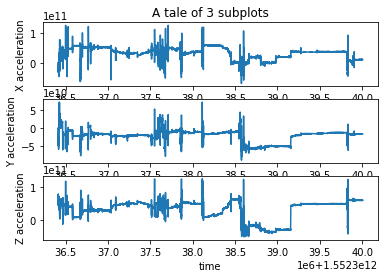

In [ ]:
import matplotlib.pyplot as plt



plt.subplot(3, 1, 1)
plt.plot(x["time"], x["data"], '-')
plt.title('A tale of 3 subplots')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(y["time"], y["data"], '-')
plt.xlabel('time')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(z["time"], z["data"], '-')
plt.xlabel('time')
plt.ylabel('Z acceleration')
"""
plt.subplot(3, 1, 3)
plt.plot(mag["time"], mag["data"], '-')
plt.xlabel('time')
plt.ylabel('Z acceleration')
"""
plt.show()

In [ ]:
x.rename(columns={'time': 'time', 'data': 'x-position'}, inplace=True)
y.rename(columns={'time': 'time', 'data': 'y-position'}, inplace=True)
z.rename(columns={'time': 'time', 'data': 'z-position'}, inplace=True)

In [ ]:
os.chdir("/content/data/MSEL_01097/Empatica-BVP")
!ls

In [ ]:
BVP = pd.read_parquet(sample_BVP, engine="auto")
BVP.rename(columns={'time': 'time', 'data': 'BVP'}, inplace=True)

Text(0, 0.5, 'BVP')

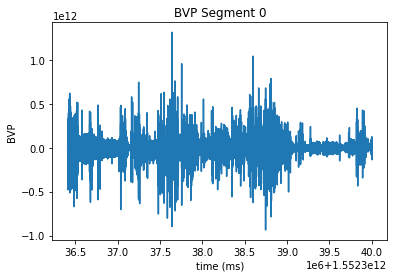

In [ ]:
plt.plot(BVP["time"], BVP["data"], '-')
plt.title('BVP Segment 0')
plt.xlabel('time (ms)')
plt.ylabel('BVP')

In [ ]:
BVP

,time,data
0,1.552336e+12,1.672363e+08
1,1.552336e+12,1.672363e+08
2,1.552336e+12,1.672363e+08
3,1.552336e+12,1.672363e+08
4,1.552336e+12,1.672363e+08
...,...,...
459995,1.552340e+12,-1.411939e+10
459996,1.552340e+12,-1.317334e+10
459997,1.552340e+12,-1.203784e+10
459998,1.552340e+12,-1.080786e+10


In [ ]:
BVP

,time,BVP
0,1.552336e+12,1.672363e+08
1,1.552336e+12,1.672363e+08
2,1.552336e+12,1.672363e+08
3,1.552336e+12,1.672363e+08
4,1.552336e+12,1.672363e+08
...,...,...
459995,1.552340e+12,-1.411939e+10
459996,1.552340e+12,-1.317334e+10
459997,1.552340e+12,-1.203784e+10
459998,1.552340e+12,-1.080786e+10


In [ ]:
merge_df = pd.merge(x, y, on='time', z, on = 'time')
merge_df

SyntaxError: ignored

In [ ]:
merge_df = pd.merge(merge_df, z, on='time')

In [ ]:
merge_df

,time,x-position,y-position,z-position
0,1.552336e+12,-1.199174e+10,-2.299048e+10,5.799730e+10
1,1.552336e+12,-1.174261e+10,-2.299048e+10,5.799730e+10
2,1.552336e+12,-1.149346e+10,-2.299048e+10,5.799730e+10
3,1.552336e+12,-1.124431e+10,-2.299048e+10,5.799730e+10
4,1.552336e+12,-1.098998e+10,-2.299048e+10,5.799730e+10
...,...,...,...,...
459995,1.552340e+12,1.100746e+10,-1.699023e+10,6.051990e+10
459996,1.552340e+12,1.100746e+10,-1.699023e+10,6.076904e+10
459997,1.552340e+12,1.100746e+10,-1.699023e+10,6.099742e+10
459998,1.552340e+12,1.100746e+10,-1.699023e+10,6.099742e+10


Text(0.5, 0, 'Time')

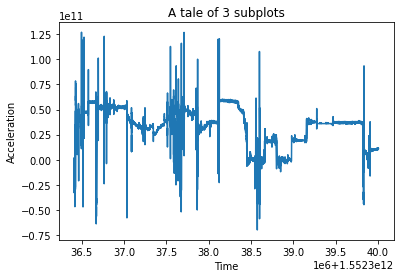

In [ ]:
plt.plot(merge_df['time'],merge_df['x-position'])
plt.title('A tale of 3 subplots')
plt.ylabel('Acceleration')
plt.xlabel('Time')


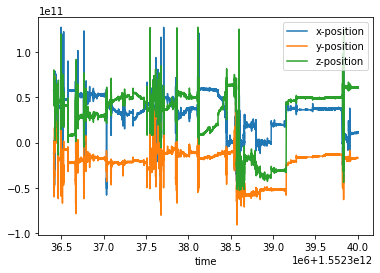

In [ ]:
ACC = merge_df.plot(x='time', y=['x-position', 'y-position', 'z-position'])
ACC

In [ ]:
merge_df = pd.merge(merge_df, BVP, on='time')

In [ ]:
merge_df

,time,x-position,y-position,z-position,BVP
0,1.552336e+12,-1.199174e+10,-2.299048e+10,5.799730e+10,1.672363e+08
1,1.552336e+12,-1.174261e+10,-2.299048e+10,5.799730e+10,1.672363e+08
2,1.552336e+12,-1.149346e+10,-2.299048e+10,5.799730e+10,1.672363e+08
3,1.552336e+12,-1.124431e+10,-2.299048e+10,5.799730e+10,1.672363e+08
4,1.552336e+12,-1.098998e+10,-2.299048e+10,5.799730e+10,1.672363e+08
...,...,...,...,...,...
459995,1.552340e+12,1.100746e+10,-1.699023e+10,6.051990e+10,-1.411939e+10
459996,1.552340e+12,1.100746e+10,-1.699023e+10,6.076904e+10,-1.317334e+10
459997,1.552340e+12,1.100746e+10,-1.699023e+10,6.099742e+10,-1.203784e+10
459998,1.552340e+12,1.100746e+10,-1.699023e+10,6.099742e+10,-1.080786e+10


In [ ]:
x['time'].equals(BVP['time'])

True

In [ ]:
bob = '/content/data/MSEL_01097/MSEL_01097_labels.csv'
bob = pd.read_csv(bob)


In [ ]:
bob

,Unnamed: 0,duration,id,labelGroup.id,name,startTime,labels.duration,labels.id,labels.note,labels.startTime
0,0,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,148000,256c6e2b-2170-4513-bdb1-31c8be73a5b3,subclinical - left middle temporal gyrus,1552438175000
1,1,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,46000,d6a04055-edab-4eae-8dd3-da3829257852,subclinical - left middle temporal gyrus,1552438442000
2,2,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,50000,8c72e05f-8cb7-4eb1-bcc6-d727ee4fb7e5,subclinical - left middle temporal gyrus,1552438578000
3,3,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,66000,b88a6cc7-ea62-4fc7-a6c5-48f4665b4081,subclinical - left middle temporal gyrus,1552439596000
4,4,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,103000,a01b8b7d-6500-4b01-947e-970640b53a91,subclinical - left middle temporal gyrus,1552440643000
5,5,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,73000,ef90a955-5251-4a7a-a7da-8a33f259b678,"""GTC - left middle frontal gyrus",1552476638000
6,6,4.215114e+08,fff9aaa9-b104-46e8-9227-b1b76d6f333e,85d331ff-4f46-425b-a4f0-a0ec5157d8ec,MSEL_01097,1552336411000,73000,90ba9902-6dee-41e1-b6dd-8e33e1659bf6,"""GTC - left middle frontal gyrus",1552503792000
